# AH2179 Applied Artificial Intelligence in Transportation Group 5 Project
### By Fabian Fermazin, William Öman, Itsuki Shindo

# Install and Import libraries


In [2]:
pip install calmap

In [3]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime
import calmap

In [7]:
# Load the given data and external temperature data
from google.colab import drive
drive.mount('/content/drive/')
df = pd.read_csv('/content/drive/MyDrive/AIprojectfiles/Dataset-PT_seasons.csv')
Stockholmtemp2022 = pd.read_csv('/content/drive/MyDrive/AIprojectfiles/Stockholmtemp2022.csv', sep=";")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#Adding Temperature Data

In [8]:
# Change the date format of Stockholmtemp2022 to match the df
def change_date_format(date_str):
    date_obj = pd.to_datetime(date_str)
    return date_obj.strftime("%Y%m%d")
Stockholmtemp2022["date"] = Stockholmtemp2022["date"].apply(change_date_format)

# Change the name of the date column to match the df
Stockholmtemp2022["Calendar_date"] = 0
Stockholmtemp2022["Calendar_date"] = Stockholmtemp2022["date"]
Stockholmtemp2022.drop(columns=["date"])

,temp,Calendar_date
0,-1.4,20220101
1,1.9,20220102
2,3.6,20220103
3,0.6,20220104
4,-2.2,20220105
...,...,...
176,23.1,20220626
177,24.1,20220627
178,24.1,20220628
179,19.6,20220629


In [9]:
# Merge df and Stockholmtemp2022
Stockholmtemp2022["Calendar_date"] = Stockholmtemp2022["Calendar_date"].astype(int)
df = pd.merge(df, Stockholmtemp2022, on='Calendar_date')
df.drop(columns=['date'])
df["Calendar_date"] = pd.to_datetime(df['Calendar_date'], format='%Y%m%d')

#Data Exploration


In [10]:
# Correlations between arrival delay and other variables
corr_matrix = df.corr()
corr_matrix['arrival_delay'].sort_values(ascending=False)

<ipython-input-10-a12ca9c7f161>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


arrival_delay                        1.000000
upstream_stop_delay                  0.975019
origin_delay                         0.716324
previous_bus_delay                   0.265434
factor(day_of_week)weekend           0.190783
factor(time_of_day)Off-peak          0.138109
temp                                 0.108624
stop_sequence                        0.092616
dwell_time                           0.089433
travel_time_for_previous_section     0.081113
factor(weather)Normal                0.022642
factor(temperature)Normal            0.022444
factor(weather)Rain                  0.010833
factor(weather)Snow                 -0.001579
factor(weather)Light_Snow           -0.012642
bus_id                              -0.012769
factor(temperature)Cold             -0.013595
factor(temperature)Extra_cold       -0.024602
factor(weather)Light_Rain           -0.027323
previous_trip_travel_time           -0.036870
traffic_condition                   -0.043104
recurrent_delay                   

<ipython-input-11-5285c9499a10>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = x.corr()


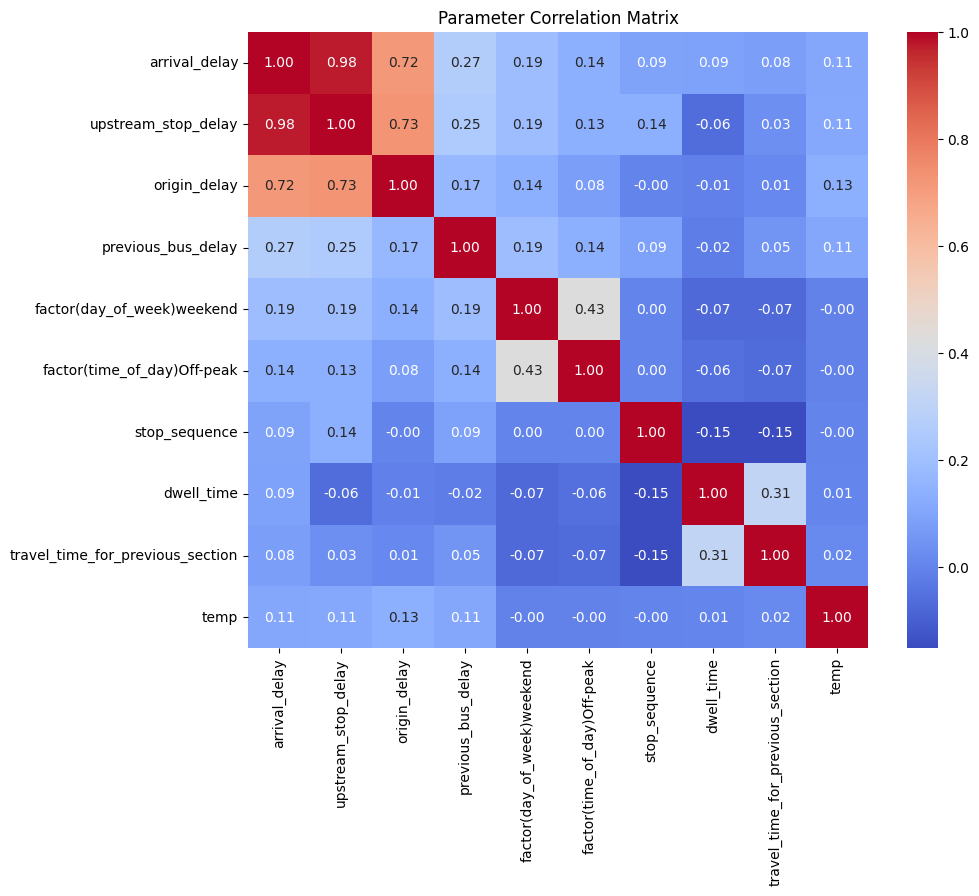

In [11]:
# Correlation Matrix of variables

x = df[['arrival_delay', 'upstream_stop_delay', 'origin_delay', 'previous_bus_delay',
        'factor(day_of_week)weekend', 'factor(time_of_day)Off-peak', 'Calendar_date',
        'stop_sequence', 'dwell_time','travel_time_for_previous_section', 'temp']]

# Calculate the correlation matrix
correlation_matrix = x.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Parameter Correlation Matrix')
plt.show()

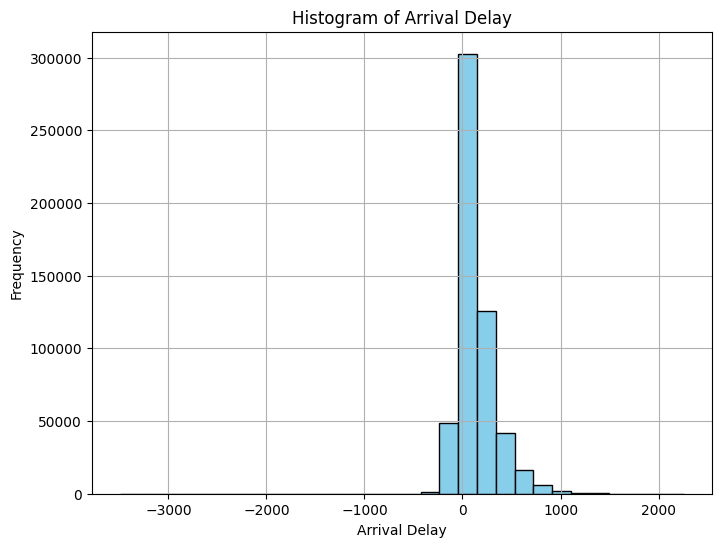

In [12]:
# Distribution of arrival delays
plt.figure(figsize=(8, 6))
plt.hist(df['arrival_delay'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Arrival Delay')
plt.xlabel('Arrival Delay')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

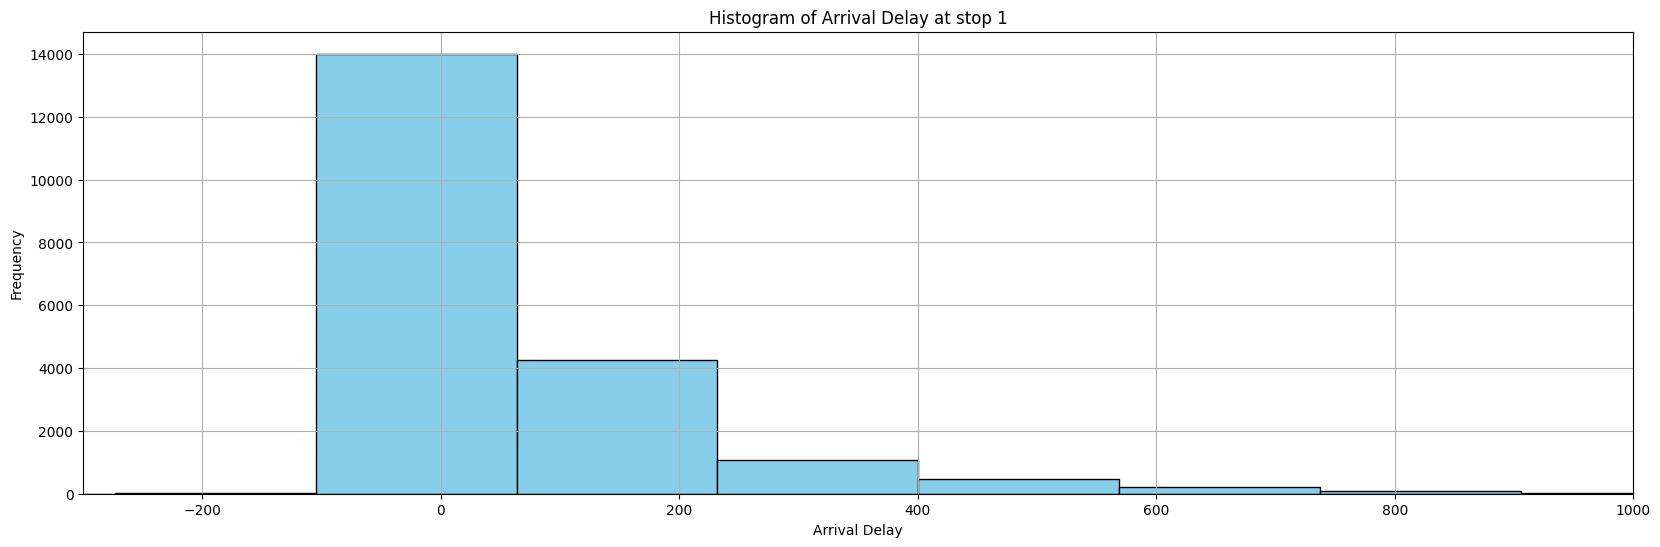

In [13]:
# Closer look at distribution of arrival delay
filtered_df = df[df['stop_sequence'] == 1]

plt.figure(figsize=(20, 6))
plt.hist(filtered_df['arrival_delay'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Arrival Delay at stop 1')
plt.xlabel('Arrival Delay')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim(-300,1000)
plt.show()

Calendar_date
2022-05-20    3969
2022-04-06    3969
2022-02-17    3969
2022-05-16    3969
2022-01-18    3969
              ... 
2022-05-30     108
2022-05-31      81
2022-06-01      81
2022-06-02      81
2022-06-03      81
Length: 173, dtype: int64

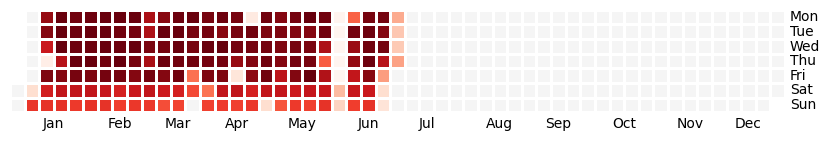

In [14]:
#higher frequency = more buses (or data measurements) that day
df['Calendar_date'] = pd.to_datetime(df['Calendar_date'])
date_freq = df.value_counts('Calendar_date')
plt.figure(figsize=(10,5))
calmap.yearplot(date_freq, year = 2022)
date_freq

In [15]:
# What days have snow? Looks reasonable
snow_by_day = df.groupby(df['Calendar_date'].dt.date)['factor(weather)Snow'].sum() > 0
days_with_snow = snow_by_day[snow_by_day].index
print("Days with snow:")
for day in days_with_snow:
    print(day)


Days with snow:
2022-02-08
2022-02-19
2022-02-21
2022-03-29
2022-04-01
2022-04-05
2022-04-07
2022-04-08
2022-04-09


In [16]:
# What days have light snow? Looks reasonable
lightsnow_by_day = df.groupby(df['Calendar_date'].dt.date)['factor(weather)Light_Snow'].sum() > 0
days_with_lightsnow = lightsnow_by_day[lightsnow_by_day].index
print("Days with light snow:")
for day in days_with_lightsnow:
    print(day)

Days with light snow:
2022-01-08
2022-01-17
2022-01-29
2022-01-30
2022-02-01
2022-02-02
2022-02-08
2022-02-17
2022-02-19
2022-02-21
2022-02-23
2022-03-31
2022-04-01
2022-04-04
2022-04-07
2022-04-08
2022-04-09


In [17]:
# What days have rain? Looks reasonable, quite few tho.
rain_by_day = df.groupby(df['Calendar_date'].dt.date)['factor(weather)Rain'].sum() > 0
days_with_rain = rain_by_day[rain_by_day].index
print("Days with rain:")
for day in days_with_rain:
    print(day)


Days with rain:
2022-01-29
2022-02-16
2022-04-07
2022-05-07
2022-05-11
2022-05-14
2022-05-20
2022-05-27
2022-05-28


In [18]:
# What days are coded extra cold? Looks reasonable
extracold_by_day = df.groupby(df['Calendar_date'].dt.date)['factor(temperature)Extra_cold'].sum() > 0
days_with_extracold = extracold_by_day[extracold_by_day].index
print("Extra cold days:")
for day in days_with_extracold:
    print(day)

Extra cold days:
2022-01-22
2022-01-25
2022-02-01
2022-02-02
2022-02-22
2022-02-23
2022-03-04
2022-03-05
2022-03-09
2022-03-12
2022-03-13
2022-03-14
2022-03-16
2022-03-29
2022-03-31
2022-04-01
2022-04-02


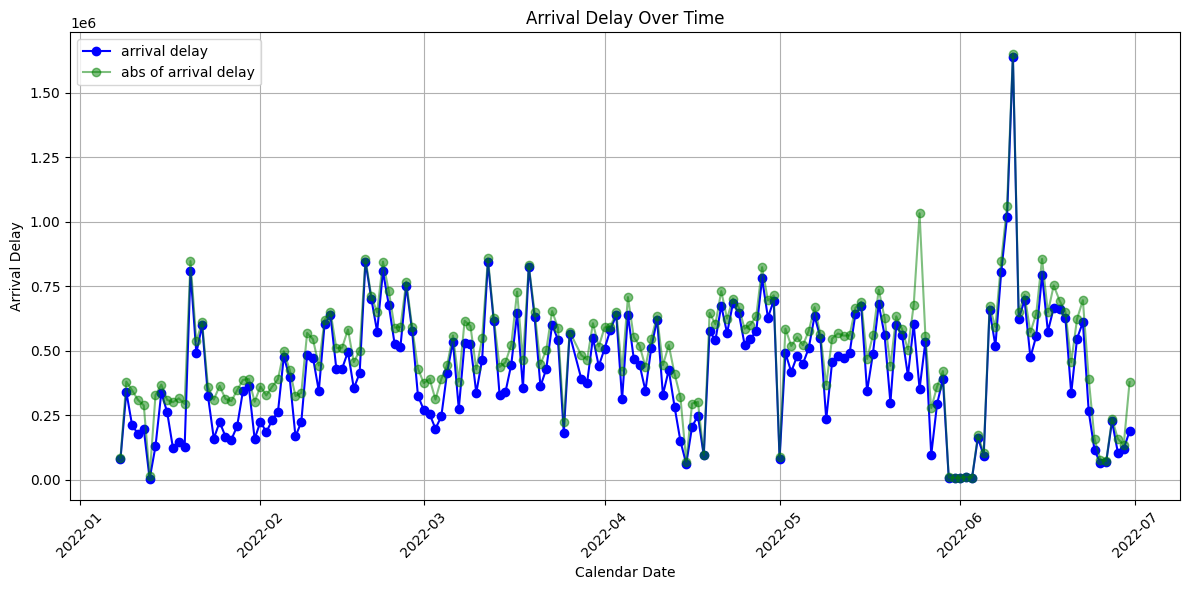

In [ ]:
# Comparing arrival delay with abs value of arrival delay troughout time

# Convert the index (Calendar_date) to datetime
Calendar_date_delay.index = pd.to_datetime(Calendar_date_delay.index)
Calendar_date_delay_abs.index = pd.to_datetime(Calendar_date_delay_abs.index)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(Calendar_date_delay.index, Calendar_date_delay.values, marker='o', linestyle='-', color='b', label ='arrival delay')
plt.plot(Calendar_date_delay_abs.index, Calendar_date_delay_abs.values, marker='o', linestyle='-', color='g', alpha = 0.5, label ='abs of arrival delay')

plt.legend()

plt.title('Arrival Delay Over Time')
plt.xlabel('Calendar Date')
plt.ylabel('Arrival Delay')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-a*xis labels for readability
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

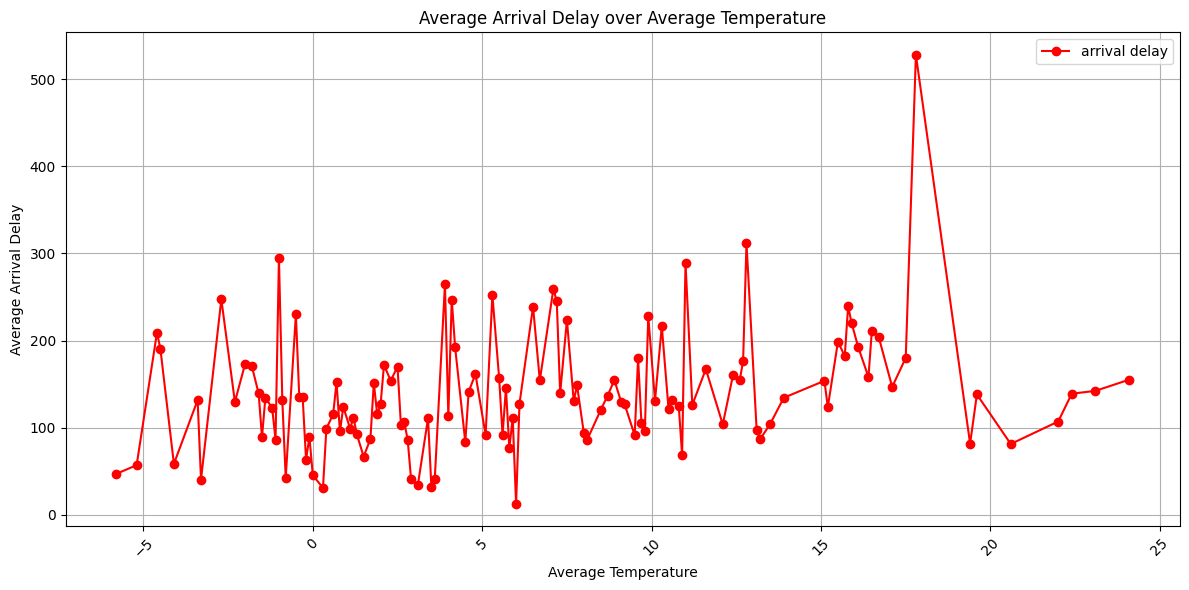

In [ ]:
# Comparing arrival delay to average temperatuer

Temp_delay = df.groupby('temp')['arrival_delay'].mean()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(Temp_delay.index, Temp_delay, marker='o', linestyle='-', color='r', label ='arrival delay')

plt.legend()

plt.title('Average Arrival Delay over Average Temperature')
plt.xlabel('Average Temperature')
plt.ylabel('Average Arrival Delay')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-a*xis labels for readability
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

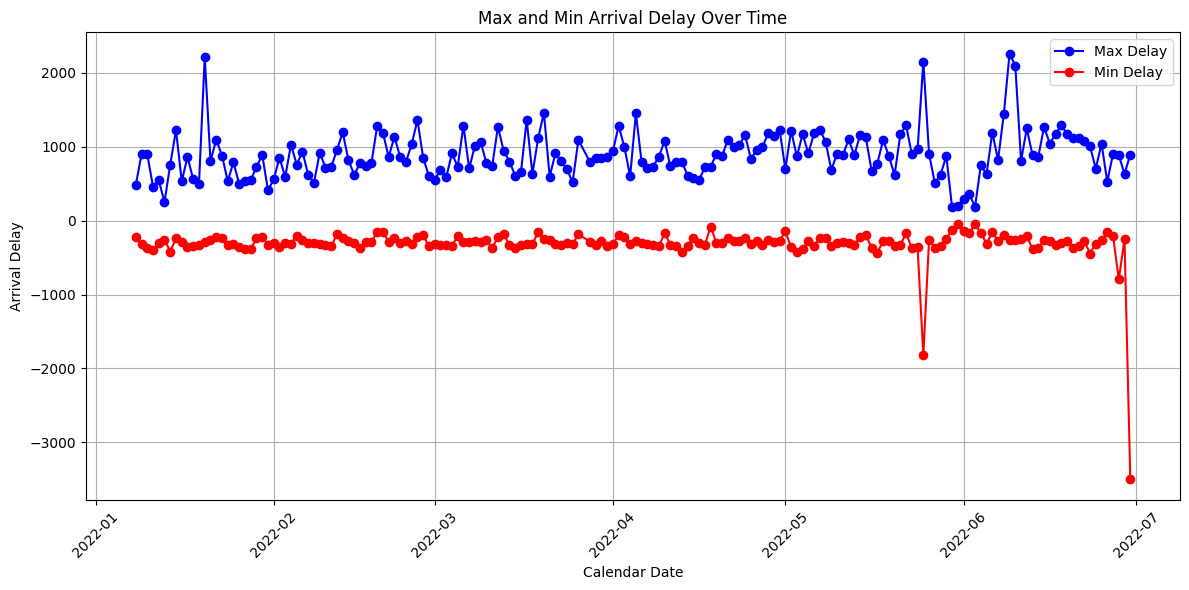

In [ ]:
# Comparing min and max delay to see if the very early busses are compensating for very delayed busses or if its an outlier
# Group the data by 'Calendar_date' and calculate max and min values
grouped = df.groupby('Calendar_date')['arrival_delay'].agg(['max', 'min']).reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(grouped['Calendar_date'], grouped['max'], marker='o', linestyle='-', color='b', label='Max Delay')
plt.plot(grouped['Calendar_date'], grouped['min'], marker='o', linestyle='-', color='r', label='Min Delay')

# Add a legend
plt.legend(loc='upper right')

plt.title('Max and Min Arrival Delay Over Time')
plt.xlabel('Calendar Date')
plt.ylabel('Arrival Delay')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Dropping the bus that is an hour early on the 30th of June, as it seemingly does not compansate for a large delay
df_new = df[(df['Calendar_date'] != '2022-06-30') | (df['bus_id'] != 41361)]

,Calendar_date,route_id,bus_id,stop_sequence,arrival_delay,dwell_time,travel_time_for_previous_section,scheduled_travel_time,upstream_stop_delay,origin_delay,...,factor(temperature)Normal,factor(day_of_week)weekday,factor(day_of_week)weekend,factor(time_of_day)Afternoon_peak,factor(time_of_day)Morning_peak,factor(time_of_day)Off-peak,Season,date,temp,arrival_delay_abs
0,2022-01-08,4,41344,1,151,0,0,120,100,100,...,1,0,1,0,0,1,Winter,20220108,-0.5,151
1,2022-01-08,4,41344,2,185,24,171,45,151,100,...,1,0,1,0,0,1,Winter,20220108,-0.5,185
2,2022-01-08,4,41344,3,186,0,55,41,185,100,...,1,0,1,0,0,1,Winter,20220108,-0.5,186
3,2022-01-08,4,41344,4,202,12,42,94,186,100,...,1,0,1,0,0,1,Winter,20220108,-0.5,202
4,2022-01-08,4,41344,5,242,21,98,86,202,100,...,1,0,1,0,0,1,Winter,20220108,-0.5,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545098,2022-06-30,4,41362,23,344,13,74,44,341,12,...,1,1,0,0,0,1,Summer,20220630,22.4,344
545099,2022-06-30,4,41362,24,330,15,34,92,344,12,...,1,1,0,0,0,1,Summer,20220630,22.4,330
545100,2022-06-30,4,41362,25,339,17,63,43,330,12,...,1,1,0,0,0,1,Summer,20220630,22.4,339
545101,2022-06-30,4,41362,26,331,0,35,58,339,12,...,1,1,0,0,0,1,Summer,20220630,22.4,331


# Model building, etc

In [19]:
from google.colab import drive
drive.mount('/content/drive/')
df = pd.read_csv('/content/drive/MyDrive/AIprojectfiles/clean_dataPT2.csv') # df_new from the end of the exploratory file.

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [20]:
df = df.drop(columns=["Unnamed: 0.1", "Unnamed: 0", "date"], axis=1) #Cleaning up from the the export/import process

In [24]:
# Creating a new df for the PCA and clustering, grouped on stop sequence and calendar data, including the variables found to be important for the models
df_test = df.groupby(['stop_sequence', 'Calendar_date'])[['dwell_time',
                                   'traffic_condition', 'recurrent_delay',
                                   'origin_delay', 'previous_bus_delay',
                                   'factor(day_of_week)weekday',
                                   'factor(time_of_day)Off-peak', 'temp',
                                   'scheduled_travel_time']].mean()
df_test

dwell_time  traffic_condition  recurrent_delay  \
stop_sequence Calendar_date                                                   
1             2022-01-08       0.000000         159.242424       158.968239   
              2022-01-09       0.000000         159.961806       155.480450   
              2022-01-10       0.000000         166.328321       156.923225   
              2022-01-11       0.000000         156.367150       156.353991   
              2022-01-12       0.000000         157.077381       162.680852   
...                                 ...                ...              ...   
27            2022-06-26       4.666667          56.925926        43.366273   
              2022-06-27      14.195652          48.615942        49.215491   
              2022-06-28      13.393939          45.575758        47.942550   
              2022-06-29      16.875000          47.052083        48.721302   
              2022-06-30      14.224490          45.224490        49.031055   

                             origin_delay  previous_bus_delay  \
stop_sequence Calendar_date                                     
1             2022-01-08        32.090909           43.636364   
              2022-01-09        68.843750           82.989583   
              2022-01-10        42.781955           32.639098   
              2022-01-11        30.442029           10.659420   
              2022-01-12        30.375000           12.357143   
...                                   ...                 ...   
27            2022-06-26        58.388889           30.277778   
              2022-06-27        86.326087          107.673913   
              2022-06-28        40.818182           69.333333   
              2022-06-29        39.906250           78.093750   
              2022-06-30        97.857143           54.224490   

                             factor(day_of_week)weekday  \
stop_sequence Calendar_date                               
1             2022-01-08                            0.0   
              2022-01-09                            0.0   
              2022-01-10                            1.0   
              2022-01-11                            1.0   
              2022-01-12                            1.0   
...                                                 ...   
27            2022-06-26                            0.0   
              2022-06-27                            1.0   
              2022-06-28                            1.0   
              2022-06-29                            1.0   
              2022-06-30                            1.0   

                             factor(time_of_day)Off-peak  temp  \
stop_sequence Calendar_date                                      
1             2022-01-08                        1.000000  -0.5   
              2022-01-09                        1.000000  -0.9   
              2022-01-10                        0.526316  -2.3   
              2022-01-11                        0.536232  -1.1   
              2022-01-12                        0.589286   1.3   
...                                                  ...   ...   
27            2022-06-26                        1.000000  23.1   
              2022-06-27                        0.456522  24.1   
              2022-06-28                        0.454545  24.1   
              2022-06-29                        0.468750  19.6   
              2022-06-30                        0.510204  22.4   

                             scheduled_travel_time  
stop_sequence Calendar_date                         
1             2022-01-08                141.818182  
              2022-01-09                151.250000  
              2022-01-10                175.488722  
              2022-01-11                175.652174  
              2022-01-12                174.642857  
...                                            ...  
27            2022-06-26                112.055556  
              2022-06-27                146.652174 

In [22]:
# Import relevant libraries for PCA and clustering
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, OPTICS
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture

In [25]:
scaling=StandardScaler()

# Use fit and transform method
scaling.fit(df_test)
Scaled_data=scaling.transform(df_test)

# Reducing to 2D
principal=KernelPCA(n_components=2, kernel = 'rbf', fit_inverse_transform= True)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)

# Check the dimensions of data after PCA
print(x.shape)

(4671, 2)


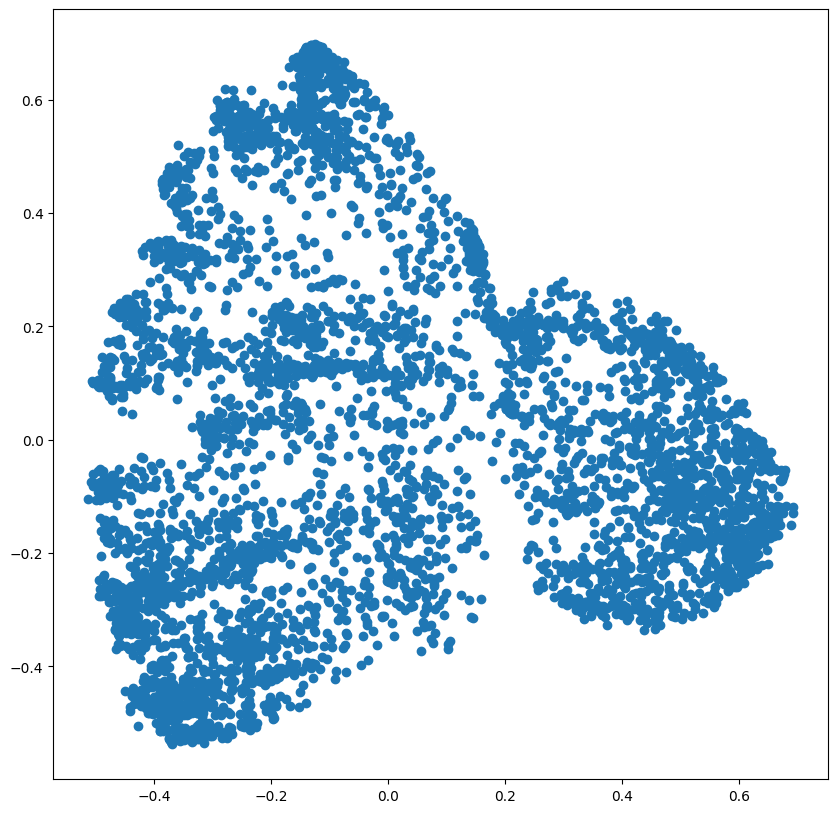

In [8]:
# Viewing the 2D KPCA dimensonally reduced data
plt.figure(figsize=(10,10))
#plt.xlim(-2.5,0)
#plt.ylim(-2,1)
plt.scatter(x[:,0],x[:,1])

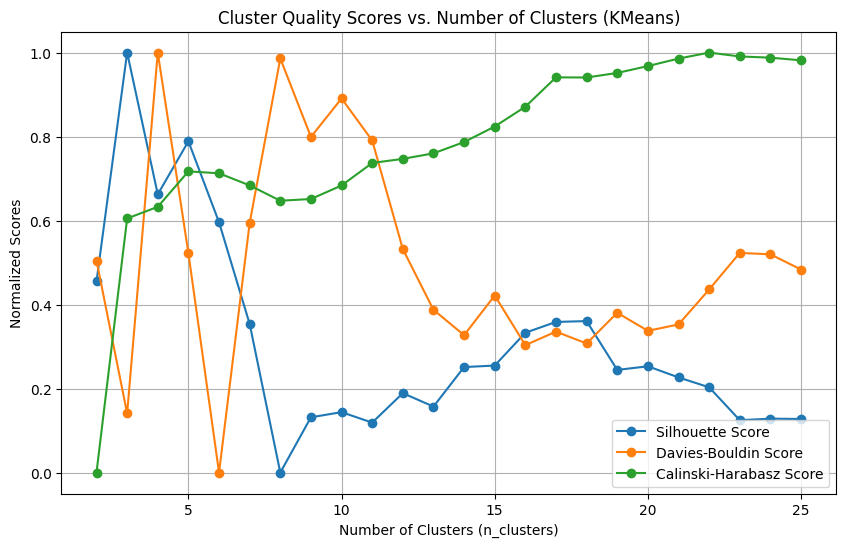

In [32]:
# Visualizing the performance of different numbers of clusters for different clustering methods

# Define a list of n_clusters values to iterate over
n_clusters_values = list(range(2,26))
# eps = float_range = np.arange(0.01, 0.5, 0.05).tolist() #for eps

# Initialize lists to store scores
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Loop over different values of n_clusters
for n_clusters in n_clusters_values:
    # Fit Clustering Method with the current number of clusters

    # Kmeans
    #clusters = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(x)

    # Agglomerative
    clusters = AgglomerativeClustering(n_clusters=n_clusters,metric='euclidean', linkage='ward').fit(x) # check the parameters at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

    # Spectral
    #clusters = SpectralClustering(n_clusters=n_clusters).fit(x)

    cluster_labels = clusters.labels_

    # Gaussian Mixture
    #clusters = GaussianMixture(n_components=n_clusters, random_state=0).fit(x)  # Use GaussianMixture
    #cluster_labels = clusters.predict(x)  # Predict the cluster labels

    # Calculate cluster quality scores
    SC_score = silhouette_score(x, cluster_labels)
    DB_score = davies_bouldin_score(x, cluster_labels)
    CH_score = calinski_harabasz_score(x, cluster_labels)

    # Append scores to the respective lists
    silhouette_scores.append(SC_score)
    davies_bouldin_scores.append(DB_score)
    calinski_harabasz_scores.append(CH_score)

# Normalize the scores between 0 and 1 (optional)
scaler = MinMaxScaler()
silhouette_scores_normalized = scaler.fit_transform(np.array(silhouette_scores).reshape(-1, 1))
davies_bouldin_scores_normalized = scaler.fit_transform(np.array(davies_bouldin_scores).reshape(-1, 1))
calinski_harabasz_scores_normalized = scaler.fit_transform(np.array(calinski_harabasz_scores).reshape(-1, 1))

# Create a DataFrame to store the normalized scores
normalized_scores_df = pd.DataFrame({
    'n_clusters': n_clusters_values,
    'Silhouette Score': silhouette_scores_normalized.flatten(),
    'Davies-Bouldin Score': davies_bouldin_scores_normalized.flatten(),
    'Calinski-Harabasz Score': calinski_harabasz_scores_normalized.flatten()
})

# Plot the scores for each n_clusters value
plt.figure(figsize=(10, 6))
plt.plot(normalized_scores_df['n_clusters'], normalized_scores_df['Silhouette Score'], label='Silhouette Score', marker='o')
plt.plot(normalized_scores_df['n_clusters'], normalized_scores_df['Davies-Bouldin Score'], label='Davies-Bouldin Score', marker='o')
plt.plot(normalized_scores_df['n_clusters'], normalized_scores_df['Calinski-Harabasz Score'], label='Calinski-Harabasz Score', marker='o')
plt.xlabel('Number of Clusters (n_clusters)')
plt.ylabel('Normalized Scores')
plt.title('Cluster Quality Scores vs. Number of Clusters (KMeans)')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
clusters = OPTICS(min_samples=8, max_eps=0.018, cluster_method='dbscan').fit(x) #OPTICS is not it
cluster_labels = clusters.labels_
print(cluster_labels, np.unique(cluster_labels), silhouette_score(x, cluster_labels), davies_bouldin_score(x,cluster_labels), calinski_harabasz_score(x, cluster_labels))

# Calculate the Silhouette, Davies-Bouldin, and Calinski-Harabasz Scores
SC_score = silhouette_score(x, cluster_labels)
DB_score = davies_bouldin_score(x, cluster_labels)
CH_score = calinski_harabasz_score(x, cluster_labels)

# Print the computed cluster quality scores
print('Silhouette Score:', SC_score)
print('Davies-Bouldin Score:', DB_score)
print('Calinski-Harabasz Score:', CH_score)

[ 0  0  1 ... 31 -1 31] [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51] -0.14871393446749098 2.419238574748797 386.6444874788142


In [16]:
# Chose n_clusters based on results from above

n_clusters = 6
min_samples = 6

# KMeans
#clusters = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(x) # check the parameters at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# Agglomerative
clusters = AgglomerativeClustering(n_clusters=n_clusters,metric='euclidean', linkage='ward').fit(x) # check the parameters at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
# OPTICS
#clusters = OPTICS(min_samples=min_samples, max_eps=0.018, cluster_method='dbscan').fit(x)

cluster_labels = clusters.labels_

# Gaussian Mixtrue
#clusters = GaussianMixture(n_components=n_clusters, random_state=0).fit(x)  # Use GaussianMixture
#cluster_labels = clusters.predict(x)

print(cluster_labels)

[3 3 3 ... 5 1 5]


In [28]:
# Recalculate the score to double check and att to comparison table

# Calculate the Silhouette Score
SC_score = silhouette_score(x, cluster_labels)
# Silhouette Score measures the quality of clusters, higher values indicate better separation.

# Calculate the Davies-Bouldin Score
DB_score = davies_bouldin_score(x, cluster_labels)
# Davies-Bouldin Score measures the average similarity between each cluster and its most similar cluster, lower values indicate better separation.

# Calculate the Calinski-Harabasz Score
CH_score = calinski_harabasz_score(x, cluster_labels)
# Calinski-Harabasz Score measures the ratio of between-cluster variance to within-cluster variance, higher values indicate better separation.

# Print the computed cluster quality scores
print('Silhouette Score:', SC_score)
print('Davies-Bouldin Score:', DB_score)
print('Calinski-Harabasz Score:', CH_score)

Silhouette Score: -0.14871393446749098
Davies-Bouldin Score: 2.419238574748797
Calinski-Harabasz Score: 386.6444874788142


In [18]:
# Applying clusters to KPCA dimension reduced data
new_x = np.zeros([len(x), 3])
for i in range(0, len(x)):
    new_x[i] = (np.append(x[i], (cluster_labels[i])))

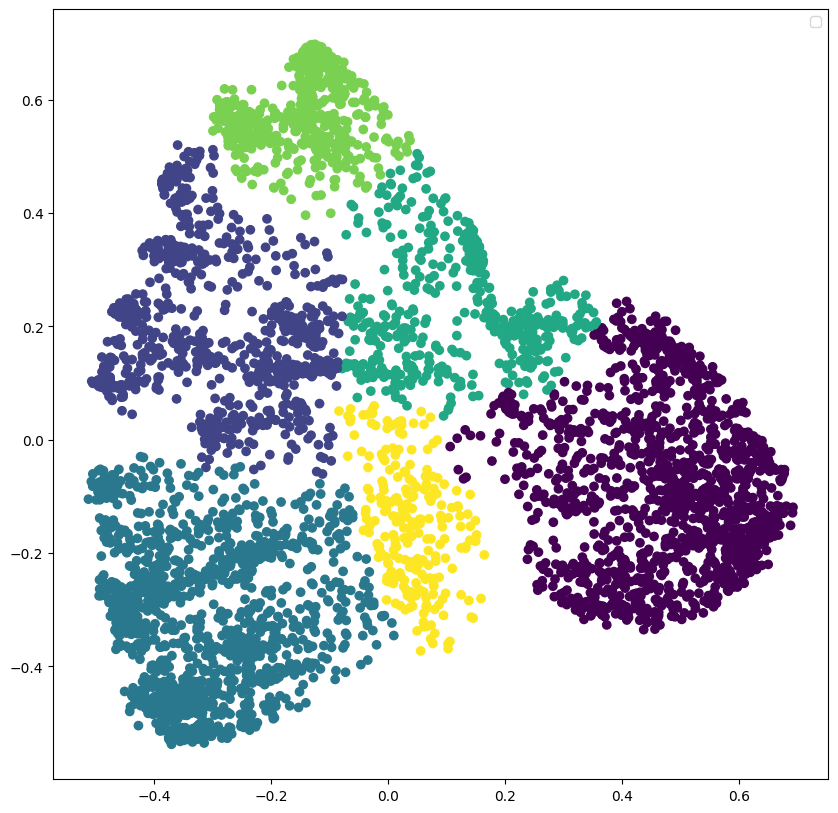

In [19]:
# Visuaization of the clusters on the KPCA data
plt.figure(figsize=(10,10))
plt.scatter(new_x[:,0],new_x[:,1], c=new_x[:,2])
plt.legend()

In [20]:
# Transform KPCA dimensionaly reduced data to original dimensions for predicitons
transformed_back_1 = principal.inverse_transform(x)
transformed_back_1

array([[ 0.08926563,  1.04606359,  1.03944483, ...,  0.34966952,
         0.60931874,  0.72465545],
       [ 0.05168586,  1.13738542,  1.1337543 , ...,  0.39039671,
         0.58457592,  0.79348613],
       [ 0.04060465,  1.53784638,  1.53744817, ...,  0.05207796,
         0.50119295,  1.15504643],
       ...,
       [ 0.37406509,  0.10645829,  0.07695224, ..., -0.16570474,
         0.6639698 ,  0.06943552],
       [ 0.39937838, -0.03721195, -0.06800228, ..., -0.4235057 ,
         0.51277942,  0.0391863 ],
       [ 0.36420991,  0.15419388,  0.12544284, ..., -0.12445701,
         0.67753873,  0.09732954]])

In [21]:
# Viewing the data again after dimension transform, now with column Cluster
reversed_df = pd.DataFrame(transformed_back_1)
df_test['Cluster'] = cluster_labels
df_test

dwell_time  traffic_condition  recurrent_delay  \
stop_sequence Calendar_date                                                   
1             2022-01-08       0.000000         159.242424       158.968239   
              2022-01-09       0.000000         159.961806       155.480450   
              2022-01-10       0.000000         166.328321       156.923225   
              2022-01-11       0.000000         156.367150       156.353991   
              2022-01-12       0.000000         157.077381       162.680852   
...                                 ...                ...              ...   
27            2022-06-26       4.666667          56.925926        43.366273   
              2022-06-27      14.195652          48.615942        49.215491   
              2022-06-28      13.393939          45.575758        47.942550   
              2022-06-29      16.875000          47.052083        48.721302   
              2022-06-30      14.224490          45.224490        49.031055   

                             origin_delay  previous_bus_delay  \
stop_sequence Calendar_date                                     
1             2022-01-08        32.090909           43.636364   
              2022-01-09        68.843750           82.989583   
              2022-01-10        42.781955           32.639098   
              2022-01-11        30.442029           10.659420   
              2022-01-12        30.375000           12.357143   
...                                   ...                 ...   
27            2022-06-26        58.388889           30.277778   
              2022-06-27        86.326087          107.673913   
              2022-06-28        40.818182           69.333333   
              2022-06-29        39.906250           78.093750   
              2022-06-30        97.857143           54.224490   

                             factor(day_of_week)weekday  \
stop_sequence Calendar_date                               
1             2022-01-08                            0.0   
              2022-01-09                            0.0   
              2022-01-10                            1.0   
              2022-01-11                            1.0   
              2022-01-12                            1.0   
...                                                 ...   
27            2022-06-26                            0.0   
              2022-06-27                            1.0   
              2022-06-28                            1.0   
              2022-06-29                            1.0   
              2022-06-30                            1.0   

                             factor(time_of_day)Off-peak  temp  \
stop_sequence Calendar_date                                      
1             2022-01-08                        1.000000  -0.5   
              2022-01-09                        1.000000  -0.9   
              2022-01-10                        0.526316  -2.3   
              2022-01-11                        0.536232  -1.1   
              2022-01-12                        0.589286   1.3   
...                                                  ...   ...   
27            2022-06-26                        1.000000  23.1   
              2022-06-27                        0.456522  24.1   
              2022-06-28                        0.454545  24.1   
              2022-06-29                        0.468750  19.6   
              2022-06-30                        0.510204  22.4   

                             scheduled_travel_time  Cluster  
stop_sequence Calendar_date                                  
1             2022-01-08                141.818182        3  
              2022-01-09                151.250000        3  
              2022-01-10                175.488722        3  
              2022-01-11                175.652174        3  
              2022-01-12                174.642857        3  
...                                            ...      ...  
27            2022-06-26        

# Some exploratory graphs of the clustered data

<Axes: xlabel='factor(day_of_week)weekday', ylabel='count'>

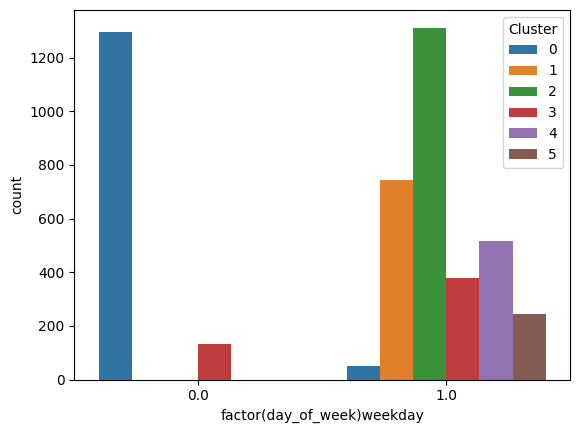

In [25]:
sns.countplot(data=df_test, x='factor(day_of_week)weekday', hue='Cluster')

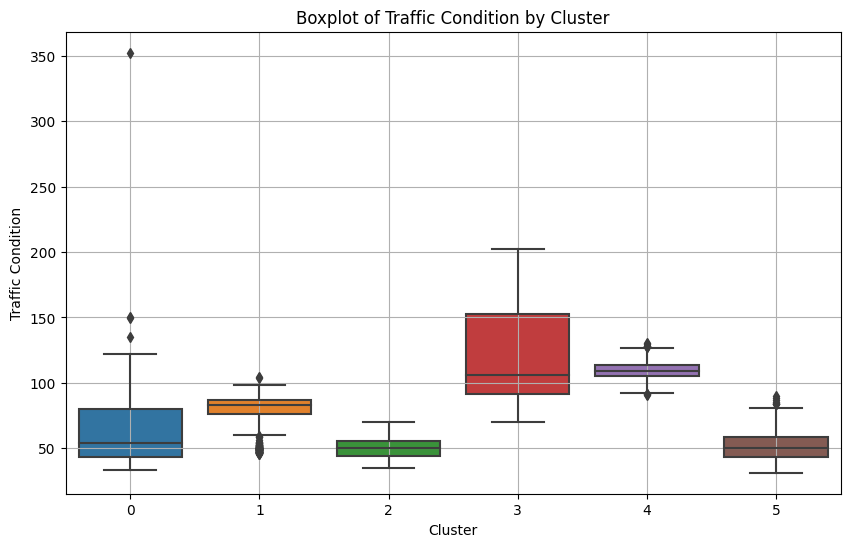

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_test, x='Cluster', y='traffic_condition')
plt.title('Boxplot of Traffic Condition by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Traffic Condition')
plt.grid(True)
plt.show()

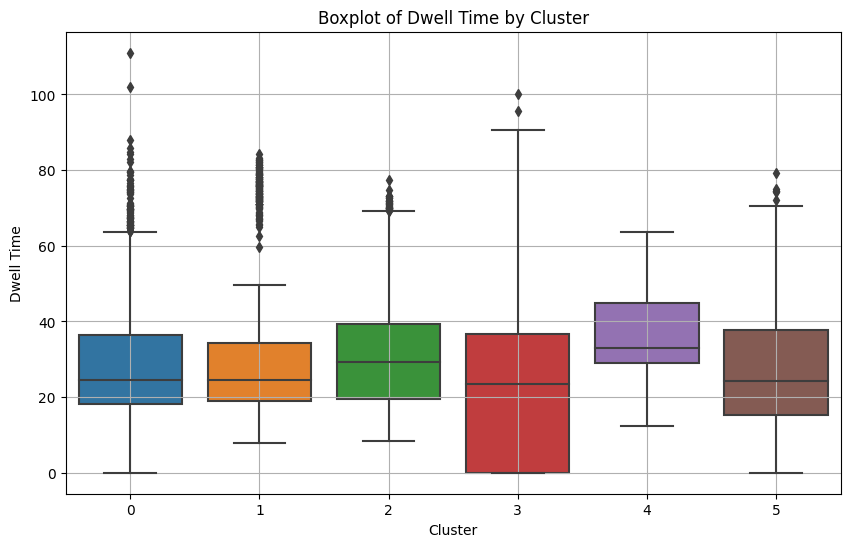

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_test, x='Cluster', y='dwell_time')
plt.title('Boxplot of Dwell Time by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Dwell Time')
plt.grid(True)
plt.show()

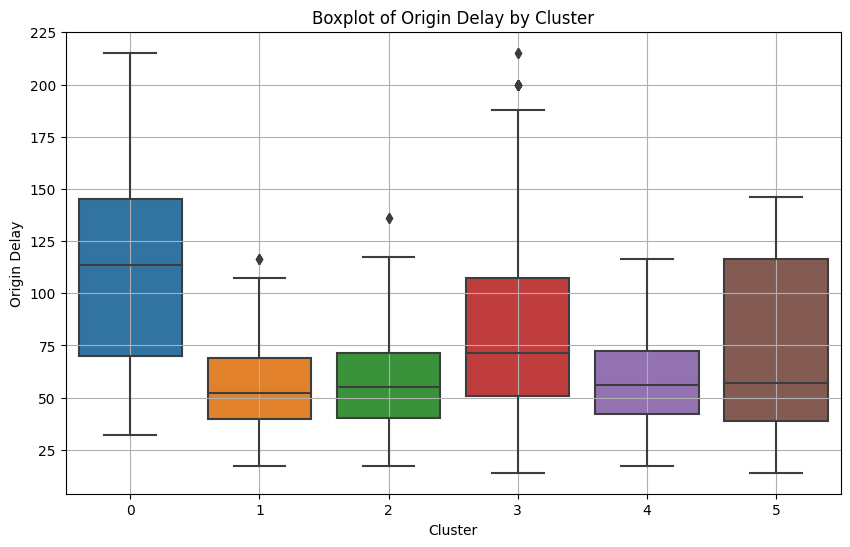

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_test, x='Cluster', y='origin_delay')
plt.title('Boxplot of Origin Delay by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Origin Delay')
plt.grid(True)
plt.show()

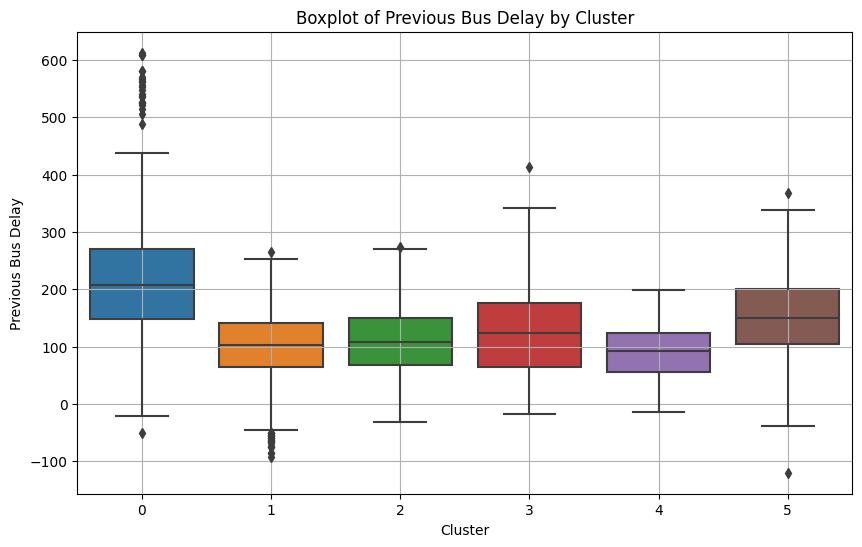

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_test, x='Cluster', y='previous_bus_delay')
plt.title('Boxplot of Previous Bus Delay by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Previous Bus Delay')
plt.grid(True)
plt.show()

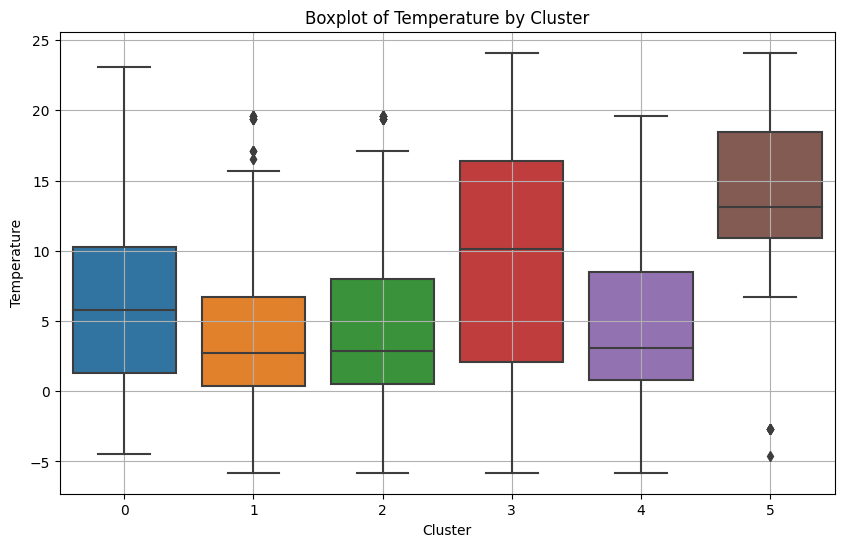

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_test, x='Cluster', y='temp')
plt.title('Boxplot of Temperature by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

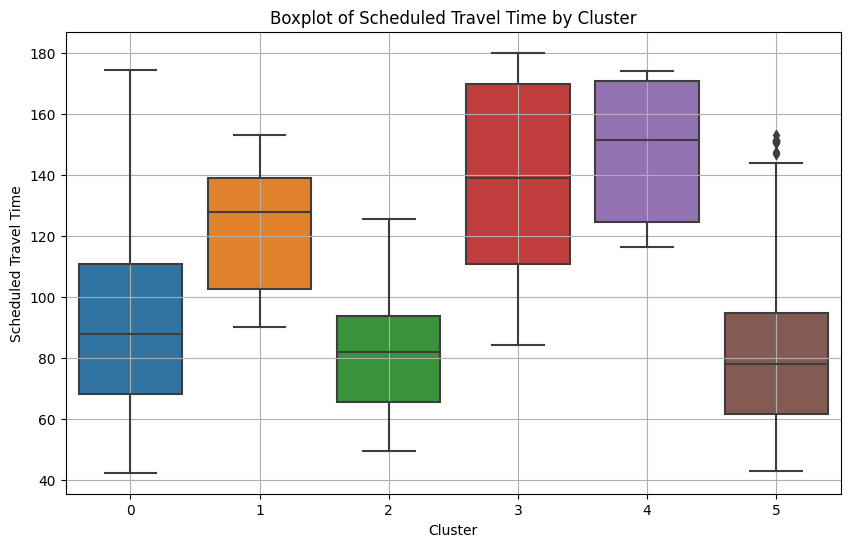

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_test, x='Cluster', y='scheduled_travel_time')
plt.title('Boxplot of Scheduled Travel Time by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Scheduled Travel Time')
plt.grid(True)
plt.show()